### Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import e
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

#### Ex.0. Please get yourself familiar with the data

In [ ]:
data.head()

In [ ]:
data.describe()

#### Ex.1. Please follow the steps below:


#### -divide the data into parameters (X) and labels/classes (y)

In [ ]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

#### -create theta vector

In [ ]:
theta = np.zeros((X.shape[0]+1, 1))

#### -add a row with values '1' on the top of the X matrix

In [ ]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

#### -normalize features of X matrix

In [ ]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

#### Ex.2. Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

In [ ]:
X = data[['Exam 1', 'Exam 2']]
y = data['Admitted']
X = np.array(X.values)
y = np.array(y.values)

X = np.append(np.ones((1, X.shape[0])), np.transpose(X), axis=0)
plt.scatter(X[1, y == 1], X[2, y == 1], c='green', marker='+')
plt.scatter(X[1, y == 0], X[2, y == 0], c='red', marker='*')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(['Admitted', 'Not admitted'])
plt.show()

#### Ex.3. Please implement a logistic function (sigmoid): 

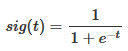

In [ ]:
def sig(t):
    return (1/(1 + np.exp(-t)))

#### Ex.4. Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it.

In [ ]:
test_sig = np.arange(-5, 5, 0.5)
plt.figure()
plt.plot(test_sig, sig(test_sig))
plt.show()

## Cost function for logistic regression

#### Ex.5. Please implement the cost function J (recommended vectorized solution):
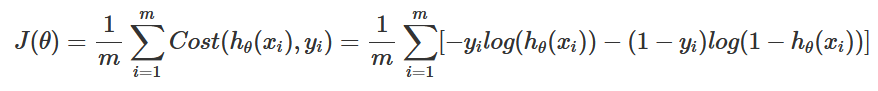

In [ ]:
def cost(theta, X, y):
    h = sig(np.dot(theta, X))
    m = X.shape[1]
    J = np.sum(-np.log(h)*np.transpose(y) - np.log(1 - h)*np.transpose(1-y))/m
    return J

#### Test the cost function

In [ ]:
theta = np.zeros(3)
theta = np.matrix(theta)
X = np.matrix(X)
y = np.matrix(y)
print(cost(theta, X, y))

### Simple gradient method

#### Ex.6. Please implement simple gradient function

In [ ]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number od iteration
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yx = h_y @ X.T
        theta = theta - alpha * h_yx.T / X.shape[1]
        cost = cost + [cost(X, y, theta)]
    return theta, cost

#### For the parameter alpha = 1 and 150 iterations, the cost function is around 0.20 and the values of θ [1.65947664], [3.8670477], [3.60347302]. Results may vary.

In [ ]:
alpha = 1
it = 150
theta, cost = simple_gradient(X, y, theta, alpha, it)

#### Ex.7. Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5.

#### Ex.8.Please plot the decision boundary (as a line x2=mx1+c) on the data plot. If you have normalized your data you should use normalized data as background.

In [ ]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.show()

### Logistic regression - Python

### Multi-class logistic regression

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target
X = (X - X.mean()) / X.std()

#### Ex.1. Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

In [140]:
logreg = LogisticRegression(C=1, solver='newton-cg', multi_class='multinomial')
logreg.fit(X, y)

ValueError: y should be a 1d array, got an array of shape (1, 100) instead.

#### Ex.2. Create an instance and fit the data using fit method. Code below allows you to display the shape of decision regions:

In [141]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### Ex.3. Using method predict_proba please predict the probability of being a member of a given class.

#### Ex.4. Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2)